In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import cantera as ct
import matplotlib.pyplot as plt
import json

# Importing packages
import feedstock as fs
import pp
import gasifier as g
import fuel as fu
import energy as en
import outputs as op

FileNotFoundError: [Errno 2] No such file or directory: 'legacy/fuels-updated.csv'

In [ ]:
# JAYAH 2003
fuelID = 'Rubber'
T = 950 + 273.15 # K
P = ct.one_atm
moist = [0.185, 0.160, 0.147, 0.160, 0.152, 0.140, 0.147, 0.138, 0.125]
air = [2.03, 2.20, 2.37, 1.96, 2.12, 2.29, 1.86, 2.04, 2.36]
species = ['CO', 'H2', 'CO2', 'CH4', 'N2']

y = np.zeros((len(moist), len(species)))
yields = np.zeros((len(moist)))

for i, m in enumerate(moist):
    results = g.gasifier(fuelID, moist=m, T=T, P=P, air=air[i], airType='air', species=species)
    report = results[0]
    yields[i] = report['Y']
    for j, s in enumerate(species):
        y[i,j] = report[s]

for yy in y[:,4]:
    print(yy*100)

69.6167052979424
69.23766378177329
68.92989111468249
69.78840037213907
69.40201309051064
69.06319816848996
70.0669592825617
69.58194785898793
68.93942704729349


In [ ]:
CO = [19.6, 20.2, 19.4, 18.4, 19.7, 18.9, 19.1, 22.1, 19.1]
H2 = [17.2, 18.3, 17.2, 17.0, 13.2, 12.5, 15.5, 12.7, 13.0]
CO2 = [9.9, 9.7, 9.7, 10.6, 10.8, 8.5, 11.4, 10.5, 10.7]
CH4 = [1.4, 1.1, 1.1, 1.3, 1.3, 1.2, 1.1, 1.3, 1.2]
N2 = [51.9, 50.7, 52.6, 52.7, 55.0, 59.1, 52.9, 53.4, 56.0]

In [ ]:
# y2 = np.zeros((len(moist), len(species)))
# yields2 = np.zeros((len(moist)))

# for i, exp in enumerate(CO):
#     experimental = [CO[i]/100, H2[i]/100, CO2[i]/100, CH4[i]/100, N2[i]/100]
#     Tquasi, sqerr = g.findTquasi(fuelID, experimental=experimental, fuelMass=1, moist=moist[i], T0=T, P=P, air=air[i], airType='air', species=species)
#     print(Tquasi)
#     results = g.gasifier(fuelID, moist=moist[i], T=Tquasi, P=P, air=air[i], airType='air', species=species)
#     report = results[0]
#     yields2[i] = report['Y']
#     for j, s in enumerate(species):
#         y2[i,j] = report[s]


    

In [ ]:
# for yy in y2[:,4]:
#     print(yy*100)

In [ ]:
fuelID = 'Rubber'
species = ['CO', 'H2', 'CO2', 'CH4', 'N2']
moist0 = 0.15
P0 = ct.one_atm
T0 = 1000 # K
ER0 = 0.4
moistL = np.arange(0, 1+0.01, 0.01)
TL = np.arange(800, 1400+10, 10)
PL = np.arange(0.8*10**5, (2.0+0.01)*10**5, 0.01*10**5)
ERL = np.arange(0, 1+0.01, 0.01)

In [ ]:
yt = np.zeros((len(TL), len(species)))
yieldst = np.zeros((len(TL)))
CGEt = np.zeros((len(TL)))
HHVt = np.zeros((len(TL)))

for i, t in enumerate(TL):
    results = g.gasifier(fuelID, moist=moist0, T=t, P=P0, air=ER0, airType='ER', species=species)
    report = results[0]
    yieldst[i] = report['Y']
    CGEt[i] = report['CGE']
    HHVt[i] = report['HHV']
    for j, s in enumerate(species):
        yt[i,j] = report[s]

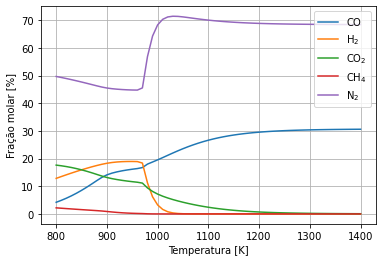

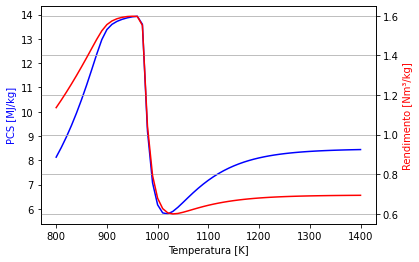

In [ ]:
figt1 = plt.figure()
plt.plot(TL, yt[:,0]*100, label='$\mathregular{CO}$')
plt.plot(TL, yt[:,1]*100, label='$\mathregular{H_2}$')
plt.plot(TL, yt[:,2]*100, label='$\mathregular{CO_2}$')
plt.plot(TL, yt[:,3]*100, label='$\mathregular{CH_4}$')
plt.plot(TL, yt[:,4]*100, label='$\mathregular{N_2}$')
#lt.title('Composição do gás vs. Temperatura')
plt.xlabel('Temperatura [K]')
plt.ylabel('Fração molar [%]')
plt.legend()
plt.grid()
plt.savefig('results/JayahT1')
plt.show()

figt2, ax1 = plt.subplots()
plt.xlabel('Temperatura [K]')
ax1.plot(TL, HHVt, label='PCS [MJ/kg]', color='b')
ax1.set_ylabel("PCS [MJ/kg]",color="b")
ax2 = ax1.twinx()
ax2.plot(TL, yieldst, label='Rendimento [Nm³/kg]', color='r')
ax2.set_ylabel("Rendimento [Nm³/kg]",color="r")
#plt.title('Rendimento e PCS vs. Temperatura')
plt.grid()
plt.savefig('results/JayahT2')
plt.show()

In [ ]:
yp = np.zeros((len(PL), len(species)))
yieldsp = np.zeros((len(PL)))
CGEp = np.zeros((len(PL)))
HHVp = np.zeros((len(PL)))

for i, p in enumerate(PL):
    results = g.gasifier(fuelID, moist=moist0, T=T0, P=p, air=ER0, airType='ER', species=species)
    report = results[0]
    yieldsp[i] = report['Y']
    CGEp[i] = report['CGE']
    HHVp[i] = report['HHV']
    for j, s in enumerate(species):
        yp[i,j] = report[s]

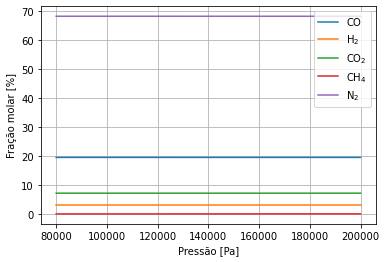

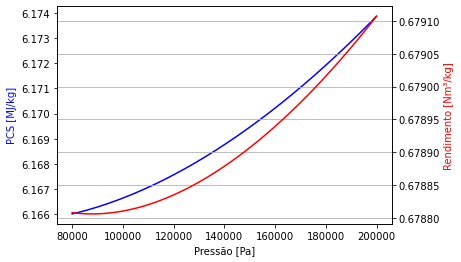

In [ ]:
figp1 = plt.figure()
plt.plot(PL, yp[:,0]*100, label='$\mathregular{CO}$')
plt.plot(PL, yp[:,1]*100, label='$\mathregular{H_2}$')
plt.plot(PL, yp[:,2]*100, label='$\mathregular{CO_2}$')
plt.plot(PL, yp[:,3]*100, label='$\mathregular{CH_4}$')
plt.plot(PL, yp[:,4]*100, label='$\mathregular{N_2}$')
#plt.title('Composição do gás vs. Pressão')
plt.xlabel('Pressão [Pa]')
plt.ylabel('Fração molar [%]')
plt.legend()
plt.grid()
plt.savefig('results/JayahP1')
plt.show()

figp2, axp1 = plt.subplots()
plt.xlabel('Pressão [Pa]')
axp1.plot(PL, HHVp, label='PCS [MJ/kg]', color='b')
axp1.set_ylabel("PCS [MJ/kg]",color="b")
axp2 = axp1.twinx()
axp2.plot(PL, yieldsp, label='Rendimento [Nm³/kg]', color='r')
axp2.set_ylabel("Rendimento [Nm³/kg]",color="r")
#plt.title('Rendimento e PCS vs. Pressão')
plt.grid()
plt.savefig('results/JayahP2')
plt.show()

In [ ]:
ym = np.zeros((len(moistL), len(species)))
yieldsm = np.zeros((len(moistL)))
CGEm = np.zeros((len(moistL)))
HHVm = np.zeros((len(moistL)))

for i, m in enumerate(moistL):
    results = g.gasifier(fuelID, moist=m, T=T0, P=P0, air=ER0, airType='ER', species=species)
    report = results[0]
    yieldsm[i] = report['Y']
    HHVm[i] = report['HHV']
    for j, s in enumerate(species):
        ym[i,j] = report[s]

d:\user\Desktop\Faculdade\gasification\legacy\outputs.py:353: RuntimeWarning: divide by zero encountered in double_scalars
  return syngasLHV(mix)/fuelLHV


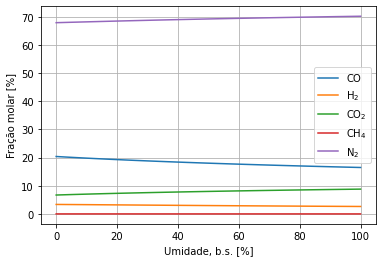

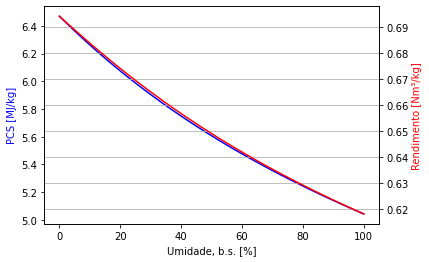

In [ ]:
figm1 = plt.figure()
plt.plot(moistL*100, ym[:,0]*100, label='$\mathregular{CO}$')
plt.plot(moistL*100, ym[:,1]*100, label='$\mathregular{H_2}$')
plt.plot(moistL*100, ym[:,2]*100, label='$\mathregular{CO_2}$')
plt.plot(moistL*100, ym[:,3]*100, label='$\mathregular{CH_4}$')
plt.plot(moistL*100, ym[:,4]*100, label='$\mathregular{N_2}$')
#plt.title('Composição do gás vs. Umidade')
plt.xlabel('Umidade, b.s. [%]')
plt.ylabel('Fração molar [%]')
plt.legend()
plt.grid()
plt.savefig('results/JayahM1')
plt.show()

figm2, axm1 = plt.subplots()
plt.xlabel('Umidade, b.s. [%]')
axm1.plot(moistL*100, HHVm, label='PCS [MJ/kg]', color='b')
axm1.set_ylabel("PCS [MJ/kg]",color="b")
axm2 = axm1.twinx()
axm2.plot(moistL*100, yieldsm, label='Rendimento [Nm³/kg]', color='r')
axm2.set_ylabel("Rendimento [Nm³/kg]",color="r")
#plt.title('Rendimento e PCS vs. Umidade')
plt.grid()
plt.savefig('results/JayahM2')
plt.show()

In [ ]:
yr = np.zeros((len(ERL), len(species)))
yieldsr = np.zeros((len(ERL)))
CGEr = np.zeros((len(ERL)))
HHVr = np.zeros((len(ERL)))

for i, er in enumerate(ERL):
    results = g.gasifier(fuelID, moist=moist0, T=T0, P=P0, air=er, airType='ER', species=species)
    report = results[0]
    yieldsr[i] = report['Y']
    HHVr[i] = report['HHV']
    for j, s in enumerate(species):
        yr[i,j] = report[s]

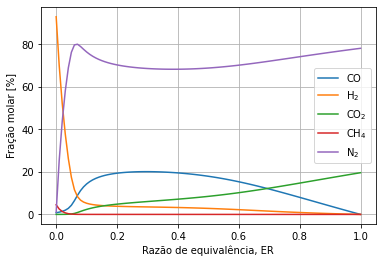

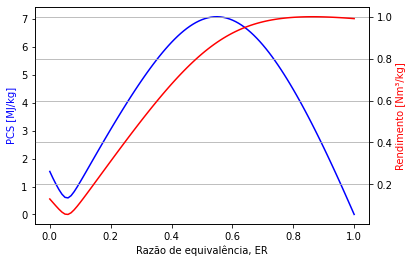

In [ ]:
figr1 = plt.figure()
plt.plot(ERL, yr[:,0]*100, label='$\mathregular{CO}$')
plt.plot(ERL, yr[:,1]*100, label='$\mathregular{H_2}$')
plt.plot(ERL, yr[:,2]*100, label='$\mathregular{CO_2}$')
plt.plot(ERL, yr[:,3]*100, label='$\mathregular{CH_4}$')
plt.plot(ERL, yr[:,4]*100, label='$\mathregular{N_2}$')
#plt.title('Composição do gás vs. Razão de equivalência')
plt.xlabel('Razão de equivalência, ER')
plt.ylabel('Fração molar [%]')
plt.legend()
plt.grid()
plt.savefig('results/JayahER1')
plt.show()

figr2, axr1 = plt.subplots()
plt.xlabel('Razão de equivalência, ER')
axr1.plot(ERL, HHVr, label='PCS [MJ/kg]', color='b')
axr1.set_ylabel("PCS [MJ/kg]",color="b")
axr2 = axr1.twinx()
axr2.plot(ERL, yieldsr, label='Rendimento [Nm³/kg]', color='r')
axr2.set_ylabel("Rendimento [Nm³/kg]",color="r")
#plt.title('Rendimento e PCS vs. Razão de Equivalência')
plt.grid()
plt.savefig('results/JayahER2')
plt.show()